In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [19]:
data = pd.read_csv("/content/smart_home_energy_usage_dataset.csv")

print(data.head())
print(data.info())


             timestamp  home_id  energy_consumption_kWh  \
0  2023-01-01 00:00:00       44                    2.87   
1  2023-01-01 01:00:00       81                    0.56   
2  2023-01-01 02:00:00       94                    4.49   
3  2023-01-01 03:00:00       20                    2.13   
4  2023-01-01 04:00:00        3                    2.74   

   temperature_setting_C occupancy_status     appliance  \
0                   22.1         Occupied  Refrigerator   
1                   15.4         Occupied          HVAC   
2                   22.4         Occupied   Electronics   
3                   24.6       Unoccupied    Dishwasher   
4                   21.4       Unoccupied          HVAC   

   usage_duration_minutes  season day_of_week  holiday  
0                     111  Spring      Sunday        0  
1                     103  Summer      Sunday        0  
2                      12  Autumn      Sunday        0  
3                      54  Autumn      Sunday        0  
4    

In [22]:
data['timestamp'] = pd.to_datetime(data['timestamp'])
data['hour'] = data['timestamp'].dt.hour
data['dayofweek'] = data['timestamp'].dt.dayofweek
# Removed the line attempting to map 'usage_state' as it doesn't exist
X = data[['hour','dayofweek','energy_consumption_kWh', 'temperature_setting_C', 'occupancy_status', 'season', 'holiday']]
y = data['appliance']

In [21]:
data['timestamp'] = pd.to_datetime(data['timestamp'], format="%d-%m-%Y %H:%M")

data['hour'] = data['timestamp'].dt.hour
data['dayofweek_num'] = data['timestamp'].dt.dayofweek  # Monday=0


In [23]:
label_enc = LabelEncoder()
data['occupancy_status'] = label_enc.fit_transform(data['occupancy_status'])
data['season'] = label_enc.fit_transform(data['season'])
data['day_of_week'] = label_enc.fit_transform(data['day_of_week'])
data['appliance'] = label_enc.fit_transform(data['appliance'])


In [24]:
X = data[['hour', 'dayofweek_num', 'energy_consumption_kWh',
          'temperature_setting_C', 'occupancy_status',
          'season', 'holiday']]
y = data['appliance']


In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [26]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [27]:
knn = KNeighborsClassifier(n_neighbors=5)  # k=5
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [28]:
y_pred = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.16589

 Classification Report:
               precision    recall  f1-score   support

           0       0.17      0.26      0.20     33302
           1       0.17      0.19      0.18     33422
           2       0.16      0.16      0.16     33271
           3       0.17      0.15      0.16     33499
           4       0.17      0.13      0.15     33427
           5       0.17      0.11      0.13     33079

    accuracy                           0.17    200000
   macro avg       0.17      0.17      0.16    200000
weighted avg       0.17      0.17      0.16    200000


Confusion Matrix:
 [[8805 6366 5342 4881 4206 3702]
 [8940 6252 5246 4900 4236 3848]
 [8903 6349 5200 4766 4258 3795]
 [8838 6399 5336 4866 4264 3796]
 [8815 6279 5345 4966 4322 3700]
 [8852 6199 5095 4872 4328 3733]]


In [29]:
sample = pd.DataFrame([[9, 0, 2.5, 22, 1, 2, 0]],
                      columns=['hour','dayofweek_num','energy_consumption_kWh',
                               'temperature_setting_C','occupancy_status',
                               'season','holiday'])
sample = scaler.transform(sample)
predicted = knn.predict(sample)
print("Predicted appliance class:", predicted)


Predicted appliance class: [0]


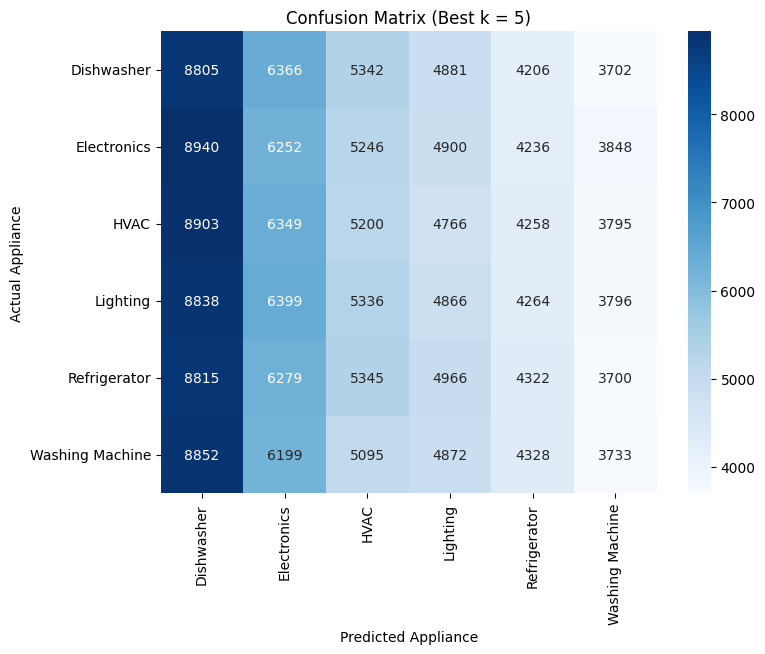

/tmp/ipython-input-3717548679.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=appliance_names, y=accuracies, palette='viridis')


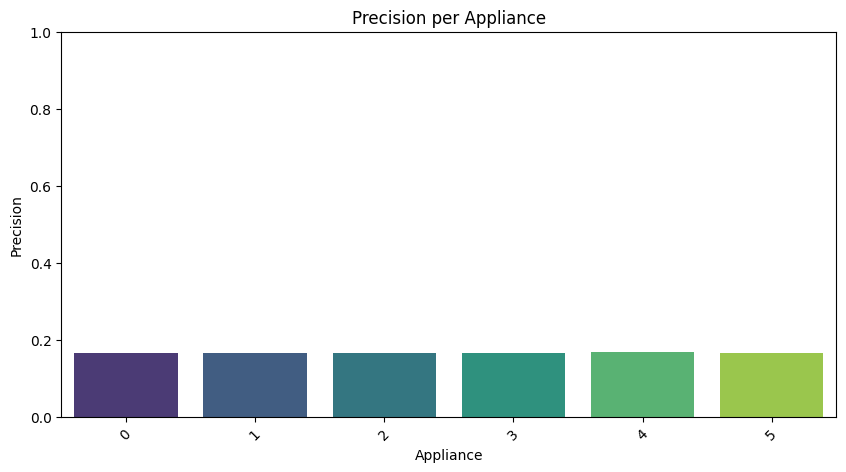

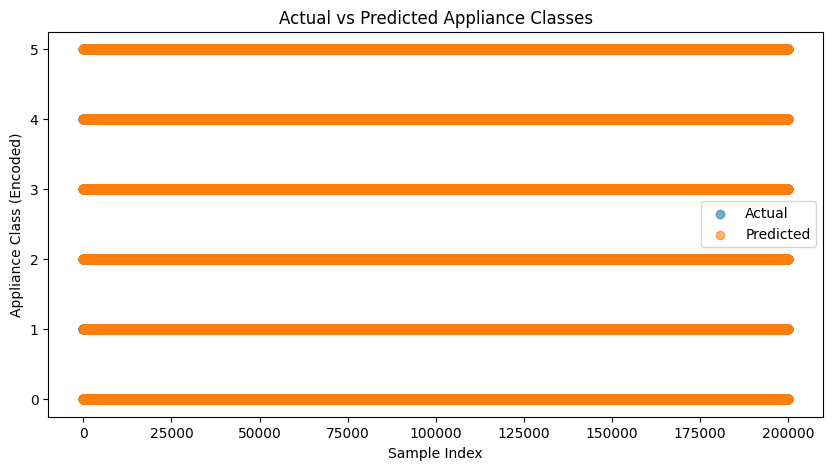

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

#Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_enc.classes_, yticklabels=label_enc.classes_)
plt.title(f"Confusion Matrix (Best k = {'5'})")
plt.xlabel("Predicted Appliance")
plt.ylabel("Actual Appliance")
plt.show()

#Accuracy per Appliance
report = classification_report(y_test, y_pred, output_dict=True)
appliance_names = list(report.keys())[:-3]  # ignore 'accuracy', 'macro avg', 'weighted avg'
accuracies = [report[app]['precision'] for app in appliance_names]

plt.figure(figsize=(10,5))
sns.barplot(x=appliance_names, y=accuracies, palette='viridis')
plt.title("Precision per Appliance")
plt.ylabel("Precision")
plt.xlabel("Appliance")
plt.ylim(0,1)
plt.xticks(rotation=45)
plt.show()

#Predictions vs Actual Scatter
plt.figure(figsize=(10,5))
plt.scatter(range(len(y_test)), y_test, label="Actual", alpha=0.6)
plt.scatter(range(len(y_pred)), y_pred, label="Predicted", alpha=0.6)
plt.title("Actual vs Predicted Appliance Classes")
plt.xlabel("Sample Index")
plt.ylabel("Appliance Class (Encoded)")
plt.legend()
plt.show()